1. We define a SMA period.
2. If the adjusted close price is above the SMA(SMA period) we enter a long position (we place a buy market order).
3. If a long position is in place, and the adjusted close price drops below the SMA(15) we exit the long position (we place a sell market order).

In [1]:
!pip install pyalgotrade
#!pip install --upgrade pandas
!pip install --upgrade pandas==1.5.3
!pip install --upgrade pandas-datareader
!pip install yfinance


In [2]:
from __future__ import print_function

from pyalgotrade import strategy
from pyalgotrade.barfeed import yahoofeed
from pyalgotrade.technical import ma

import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import matplotlib.pyplot as plt

print(
    f"Pandas {pd.__version__}"
)

Pandas 1.5.3


In [3]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2022,4,21)

In [4]:
yf.pdr_override()

In [5]:
query_str = "AAPL"
df = web.get_data_yahoo(query_str, start, end)
#df['Close']

# adj close = adj for the corporate action

[*********************100%***********************]  1 of 1 completed


In [6]:
filename = "{}.csv".format(query_str)
#with open(filename, 'w') as csv_file:
df.to_csv(filename)

In [7]:
class StrategyTemplate(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument, smaPeriod):        # Initialization for the strategy
        super(StrategyTemplate, self).__init__(feed, 1000)
        self.__position = None
        self.__instrument = instrument
        self.setUseAdjustedValues(True)
        self.__sma = ma.SMA(feed[instrument].getPriceDataSeries(), smaPeriod)

    def onEnterOk(self, position):                          # Actions taken if the program enters a position
        execInfo = position.getEntryOrder().getExecutionInfo()
        self.info("BUY at ${}".format(execInfo.getPrice()))
  
    def onEnterCanceled(self, position):                    # Actions taken if the program cancels entering the position
        self.__position = None
  
    def onExitOk(self, position):                           # Actions taken if the program exits a position
        execInfo = position.getExitOrder().getExecutionInfo()
        self.info("SELL at ${}".format(execInfo.getPrice()))
        self.__position  = None

    def onExitCancelled(self, position):                    # Actions taken if the program cancels exiting a position
        self.__position.exitMarket()
  
    def onBars(self, bars):                                 # Actions taken after reading each row
        if self.__sma[-1] is None:
            return

        bar = bars[self.__instrument]

        if self.__position is None:
            if bar.getPrice() > self.__sma[-1]:
                self.__position = self.enterLong(self.__instrument, 10, True)
    
        elif bar.getPrice() < self.__sma[-1] and not self.__position.exitActive():
            self.__position.exitMarket()

In [8]:
def run_strategy(smaPeriod):
    feed = yahoofeed.Feed()
    feed.addBarsFromCSV(query_str, filename)

    myStrategy = StrategyTemplate(feed, query_str, smaPeriod)
    myStrategy.run()
    print("Final portfolio value: ${}".format(myStrategy.getBroker().getEquity()))
    return myStrategy.getResult()

In [9]:
strategy_results = []
labels = []
for i in range(10,30):
    strategy_results.append(run_strategy(i))
    labels.append(i)

2020-01-16 00:00:00 strategy [INFO] BUY at $76.68717596385548
2020-01-28 00:00:00 strategy [INFO] SELL at $76.44507358435214
2020-01-29 00:00:00 strategy [INFO] BUY at $79.34294397684451
2020-02-03 00:00:00 strategy [INFO] SELL at $74.41532792528217
2020-02-05 00:00:00 strategy [INFO] BUY at $79.11551850836187
2020-02-19 00:00:00 strategy [INFO] SELL at $78.44044819216211
2020-02-20 00:00:00 strategy [INFO] BUY at $79.08511802430688
2020-02-21 00:00:00 strategy [INFO] SELL at $78.10216448230571
2020-03-05 00:00:00 strategy [INFO] BUY at $72.43975186196344
2020-03-09 00:00:00 strategy [INFO] SELL at $64.65208352514068
2020-03-27 00:00:00 strategy [INFO] BUY at $61.95568559180837
2020-04-02 00:00:00 strategy [INFO] SELL at $58.913670158814526
2020-04-03 00:00:00 strategy [INFO] BUY at $59.51668222412041
2020-04-06 00:00:00 strategy [INFO] SELL at $61.502211301507195
2020-04-07 00:00:00 strategy [INFO] BUY at $66.38021365160822
2020-04-22 00:00:00 strategy [INFO] SELL at $67.0690126656121

Final portfolio value: $1175.146309248237


2022-03-25 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [67] for 10 share/s
2022-03-28 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [67] for 10 share/s
2022-03-29 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [67] for 10 share/s
2022-03-30 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [67] for 10 share/s
2022-03-31 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [67] for 10 share/s
2022-04-01 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [67] for 10 share/s
2022-04-04 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [67] for 10 share/s
2022-04-05 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [67] for 10 share/s
2022-04-06 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [67] for 10 share/s
2020-01-21 00:00:00 strategy [INFO] BUY at $77.56754903285727
2020-01-28 00:00:00 

Final portfolio value: $1188.5124205407808


2021-12-15 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [57] for 10 share/s
2021-12-16 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [57] for 10 share/s
2021-12-17 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [57] for 10 share/s
2021-12-23 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [58] for 10 share/s
2021-12-27 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [58] for 10 share/s
2021-12-28 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [58] for 10 share/s
2021-12-29 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [58] for 10 share/s
2021-12-30 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [58] for 10 share/s
2021-12-31 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [58] for 10 share/s
2022-01-03 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order 

Final portfolio value: $1213.4094743651458


2022-02-03 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [51] for 10 share/s
2022-02-04 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [51] for 10 share/s
2022-02-07 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [51] for 10 share/s
2022-02-08 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [51] for 10 share/s
2022-02-09 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [51] for 10 share/s
2022-02-10 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [51] for 10 share/s
2022-02-11 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [51] for 10 share/s
2022-02-16 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [52] for 10 share/s
2022-03-18 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [53] for 10 share/s
2022-03-21 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order 

Final portfolio value: $1209.827370815577


2021-10-08 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [43] for 10 share/s
2021-10-15 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [44] for 10 share/s
2021-10-18 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [44] for 10 share/s
2021-10-19 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [44] for 10 share/s
2021-10-20 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [44] for 10 share/s
2021-10-21 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [44] for 10 share/s
2021-10-22 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [44] for 10 share/s
2021-10-25 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [44] for 10 share/s
2021-10-26 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [44] for 10 share/s
2021-10-27 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order 

Final portfolio value: $1216.8982306598562


2022-02-17 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [48] for 10 share/s
2022-03-18 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [49] for 10 share/s
2022-03-21 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [49] for 10 share/s
2022-03-22 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [49] for 10 share/s
2022-03-23 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [49] for 10 share/s
2022-03-24 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [49] for 10 share/s
2022-03-25 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [49] for 10 share/s
2022-03-28 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [49] for 10 share/s
2022-03-29 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [49] for 10 share/s
2022-03-30 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order 

Final portfolio value: $1191.1506514349294


2021-11-05 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [41] for 10 share/s
2021-11-08 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [41] for 10 share/s
2021-11-09 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [41] for 10 share/s
2021-11-10 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [41] for 10 share/s
2021-11-15 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [42] for 10 share/s
2021-11-16 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [42] for 10 share/s
2021-11-17 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [42] for 10 share/s
2021-11-18 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [42] for 10 share/s
2021-11-19 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [42] for 10 share/s
2021-11-22 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order 

Final portfolio value: $1219.2634575401476


2021-12-27 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [38] for 10 share/s
2021-12-28 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [38] for 10 share/s
2021-12-29 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [38] for 10 share/s
2021-12-30 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [38] for 10 share/s
2021-12-31 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [38] for 10 share/s
2022-01-03 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [38] for 10 share/s
2022-01-04 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [38] for 10 share/s
2022-01-05 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [38] for 10 share/s
2022-01-31 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2022-02-01 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order 

Final portfolio value: $1187.9265862890538


2022-04-04 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2022-04-05 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2022-04-06 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2022-04-07 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2022-04-08 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2020-01-30 00:00:00 strategy [INFO] BUY at $78.38676840273111
2020-02-03 00:00:00 strategy [INFO] SELL at $74.41532792528217
2020-02-05 00:00:00 strategy [INFO] BUY at $79.11551850836187
2020-02-19 00:00:00 strategy [INFO] SELL at $78.44044819216211
2020-02-20 00:00:00 strategy [INFO] BUY at $79.08511802430688
2020-02-24 00:00:00 strategy [INFO] SELL at $72.86626953756218
2020-04-07 00:00:00 strategy [INFO] BUY at $66.38021365160822
2020-07-24 00:00:00 strategy [INFO] SELL at $89.45524

Final portfolio value: $1183.0963871498373


2022-03-28 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [37] for 10 share/s
2022-03-29 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [37] for 10 share/s
2022-03-30 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [37] for 10 share/s
2022-03-31 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [37] for 10 share/s
2022-04-01 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [37] for 10 share/s
2022-04-04 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [37] for 10 share/s
2022-04-05 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [37] for 10 share/s
2022-04-06 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [37] for 10 share/s
2022-04-07 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [37] for 10 share/s
2022-04-08 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order 

Final portfolio value: $1185.9516701020627
Final portfolio value: $1756.2925513585878


2021-08-19 00:00:00 strategy [INFO] SELL at $143.7635001630919
2021-08-23 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2021-08-24 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2021-08-25 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2021-08-26 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2021-08-27 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2021-08-30 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2021-08-31 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2021-09-01 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2021-09-02 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill AAPL order [39] for 10 share/s
2021-09-03 00:00:00

Final portfolio value: $1716.16043011629
Final portfolio value: $1667.0199187891537


2021-08-13 00:00:00 strategy [INFO] BUY at $147.66908878668752
2021-08-19 00:00:00 strategy [INFO] SELL at $143.7635001630919
2021-08-23 00:00:00 strategy [INFO] BUY at $147.01486549217273
2021-09-13 00:00:00 strategy [INFO] SELL at $149.314588987418
2021-10-18 00:00:00 strategy [INFO] BUY at $142.19728338334633
2021-11-11 00:00:00 strategy [INFO] SELL at $147.87468759558047
2021-11-15 00:00:00 strategy [INFO] BUY at $149.27440383603175
2022-01-06 00:00:00 strategy [INFO] SELL at $171.44170769541876
2022-02-01 00:00:00 strategy [INFO] BUY at $172.74216458941942
2022-02-14 00:00:00 strategy [INFO] SELL at $166.36222623212313
2022-02-16 00:00:00 strategy [INFO] BUY at $170.81526522696853
2022-02-18 00:00:00 strategy [INFO] SELL at $168.79747901829634
2022-03-21 00:00:00 strategy [INFO] BUY at $162.52546566723498
2022-04-12 00:00:00 strategy [INFO] SELL at $167.00833042878227
2022-04-14 00:00:00 strategy [INFO] BUY at $169.59266300873705
2022-04-18 00:00:00 strategy [INFO] SELL at $162.93

Final portfolio value: $1725.2588207497022
Final portfolio value: $1702.6042106263794
Final portfolio value: $1728.9735161025044


2020-10-28 00:00:00 strategy [INFO] BUY at $113.31646279028831
2020-10-29 00:00:00 strategy [INFO] SELL at $110.67684262148566
2020-11-06 00:00:00 strategy [INFO] BUY at $116.73825322131991
2020-11-24 00:00:00 strategy [INFO] SELL at $112.38720547950257
2020-11-27 00:00:00 strategy [INFO] BUY at $115.01165037889442
2021-01-07 00:00:00 strategy [INFO] SELL at $126.64405538418282
2021-01-08 00:00:00 strategy [INFO] BUY at $130.6596082360418
2021-01-15 00:00:00 strategy [INFO] SELL at $127.05842104714038
2021-01-21 00:00:00 strategy [INFO] BUY at $132.01130171712393
2021-02-01 00:00:00 strategy [INFO] SELL at $131.96198549220628
2021-02-02 00:00:00 strategy [INFO] BUY at $133.91550731917536
2021-02-17 00:00:00 strategy [INFO] SELL at $129.68889472321578
2021-04-01 00:00:00 strategy [INFO] BUY at $122.18917896287947
2021-05-05 00:00:00 strategy [INFO] SELL at $127.66329305911225
2021-06-09 00:00:00 strategy [INFO] BUY at $125.91046813086348
2021-06-11 00:00:00 strategy [INFO] SELL at $125.

Final portfolio value: $1791.8692607189093
Final portfolio value: $1736.0521340986159


2022-04-13 00:00:00 strategy [INFO] BUY at $166.3820920109528
2022-04-18 00:00:00 strategy [INFO] SELL at $162.93299565418673
2020-02-13 00:00:00 strategy [INFO] BUY at $79.46753214371145
2020-02-24 00:00:00 strategy [INFO] SELL at $72.86626953756218
2020-04-07 00:00:00 strategy [INFO] BUY at $66.38021365160822
2020-04-08 00:00:00 strategy [INFO] SELL at $64.40450436313503
2020-04-09 00:00:00 strategy [INFO] BUY at $65.86545898917059
2020-07-27 00:00:00 strategy [INFO] SELL at $92.13189707779902
2020-07-28 00:00:00 strategy [INFO] BUY at $92.7783193068559
2020-09-09 00:00:00 strategy [INFO] SELL at $115.49319069348086
2020-09-10 00:00:00 strategy [INFO] BUY at $118.54647227064935
2020-09-11 00:00:00 strategy [INFO] SELL at $112.84369955658933
2020-10-12 00:00:00 strategy [INFO] BUY at $118.25097120975725
2020-10-29 00:00:00 strategy [INFO] SELL at $110.67684262148566
2020-11-06 00:00:00 strategy [INFO] BUY at $116.73825322131991
2020-11-24 00:00:00 strategy [INFO] SELL at $112.38720547

Final portfolio value: $1716.3765710926775
Final portfolio value: $1655.5387620077388


([<matplotlib.axis.XTick at 0x204dd0b77c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

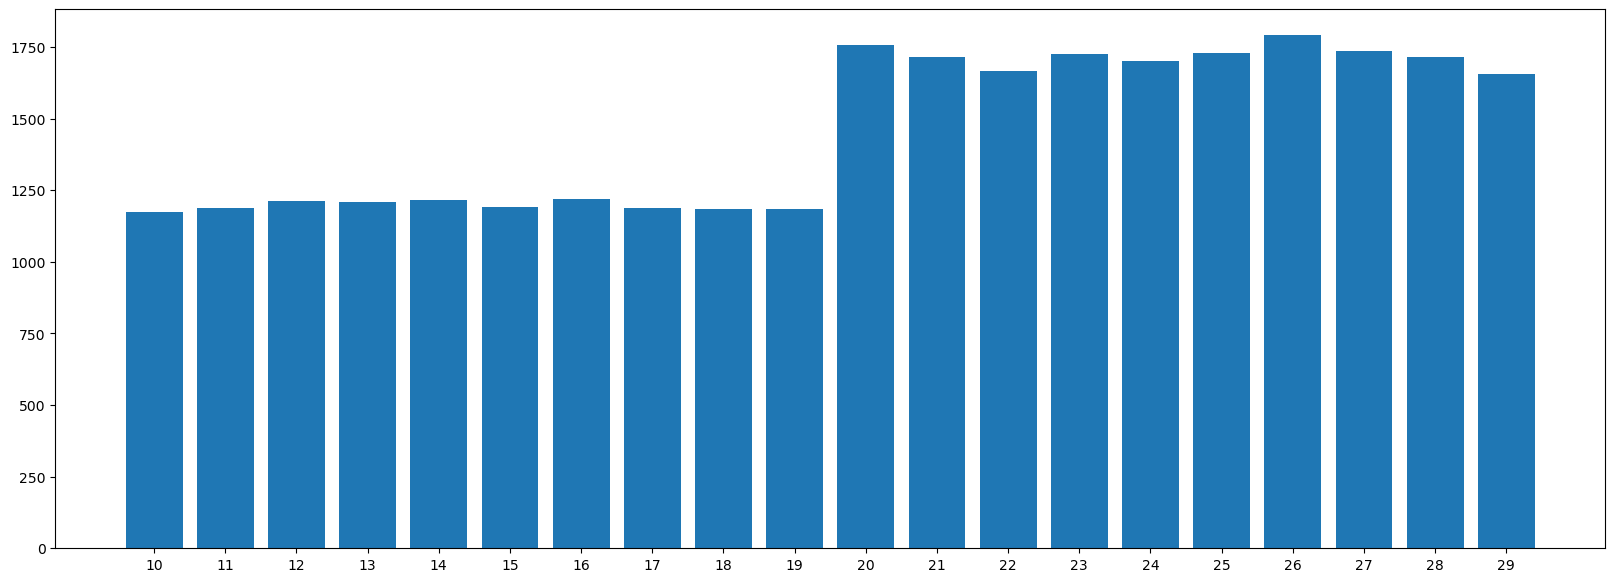

In [10]:
plt.figure(figsize=(20,7))
plt.bar(labels, strategy_results)
plt.xticks(labels)